### Kaggle API 

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sanjaypranav","key":"d47ba14759ad24de9cb235075f9ffb03"}'}

In [2]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json


kaggle.json


In [3]:
# !kaggle datasets download -d cakiki/muse-the-musical-sentiment-dataset

In [4]:
# !ls

In [5]:
# !unzip muse-the-musical-sentiment-dataset.zip

In [6]:
!kaggle datasets download -d kingofarmy/musical-emotions-classification

100% 640M/641M [00:06<00:00, 107MB/s] 
100% 641M/641M [00:06<00:00, 110MB/s]


In [7]:
%%capture
!unzip /content/musical-emotions-classification.zip

In [8]:
!rm /content/musical-emotions-classification.zip

### Importing libraries

In [9]:
!pip install pytube
!pip install rich

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 56 kB 3.6 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 237 kB 18.8 MB/s 
     |████████████████████████████████| 51 kB 6.2 MB/s 


In [ ]:
!pip install librosa

In [13]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import math, random
import librosa
import librosa.display
from IPython.display import Audio
import matplotlib.pyplot as plt
%matplotlib inline

### Data Scrapping Part

In [ ]:
# df = pd.read_csv("/content/muse_v3.csv")

In [ ]:
# df.head()

In [ ]:
# df.shape

In [ ]:
# from pytube import YouTube
# import os 
# out_file = YouTube('https://www.youtube.com/watch?v=Obim8BYGnOE').streams.filter(only_audio=True).first().download('/content/')
# base, ext = os.path.splitext(out_file)
# new_file = base + '.mp3'
# os.rename(out_file, new_file)

In [ ]:
# import IPython.display as ipd
# ipd.Audio(filename=new_file)

In [ ]:
import os
import re
import urllib.request
from pytube import YouTube

# # Python Class file for scrapping MP3

class YouTubeScrapper:

  def __init__(self, only_audio : bool = True, output_folder : str = "Music"):
    self.only_audio = only_audio
    self.output_folder = output_folder
    self.file_name = None

  def _topic_preprcessor(self,topic):
    return topic.replace(" ","+")
    
  def get_video_link(self, topic):
    print(f"Now Downloading ... {topic}.mp3")
    topic = self._topic_preprcessor(topic)
    html = urllib.request.urlopen("https://www.youtube.com/results?search_query=" + topic)
    video_ids = re.findall(r"watch\?v=(\S{11})", html.read().decode())
    return "https://www.youtube.com/watch?v=" + video_ids[0]
  
  def get_video(self,topic):
    out_file = YouTube(self.get_video_link(topic)).streams.filter(only_audio=True).first().download(os.getcwd() + '/' + self.output_folder)
    base, ext = os.path.splitext(out_file)
    new_file = base + '.mp3'
    os.rename(out_file, new_file)
    self.file_name = new_file
    return self.file_name

In [ ]:
# yt = YouTubeScrapper()
# yt.get_video("Otha sollala")

In [ ]:
# import IPython.display as ipd
# ipd.Audio(filename=yt.file_name)

In [ ]:
# df['seeds'].value_counts()

In [ ]:
# def find_song(df, song_name : str = "St. Anger"):
#   for i in df.values:
#     if i[:len(song_name)] == song_name:
#       print(f"Song {song_name} found")
#       return True
#   return False

In [ ]:
# find_song(df['track'],song_name = "Westlife")

In [ ]:
# df_smpl = df.sample(10)

In [ ]:
# from rich.progress import track
# path = []
# for i in track(df_smpl['track'], description= "Downloading songs"):
#   try:
#     path.append(yt.get_video(i))
#   except:
#     pass

In [ ]:
# df_smpl['Audio_files'] = path

## Audio Preprocessing 

In [45]:
df_train = pd.read_csv("/content/Train.csv")
df_test = pd.read_csv("/content/Test.csv")

In [15]:
df_train.shape

(1873, 4)

In [16]:
df_train.sample(3)

,GroupID,ImageID,Target,Shapes
783,Happy418,Happy41812.wav,Happy,220608
1425,Sad300,Sad30017.wav,Sad,220608
1549,Sad331,Sad33113.wav,Sad,220608


In [17]:
df_train.isna().sum()

GroupID    0
ImageID    0
Target     0
Shapes     0
dtype: int64

In [18]:
df_train['Target'].value_counts()/df_train.shape[0]

Sad      0.557928
Happy    0.442072
Name: Target, dtype: float64

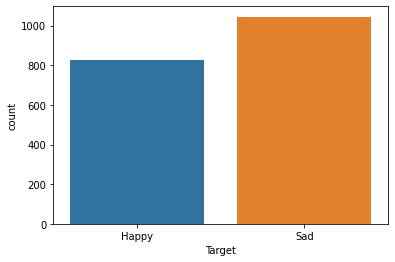

In [19]:
sns.countplot(x = df_train['Target'])
plt.show()

In [20]:
df_test['Target'].value_counts()

Sad      143
Happy    110
Name: Target, dtype: int64

In [21]:
filename = "/content/Audio_Files/Audio_Files/Train/Happy/Happy10200.wav"

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


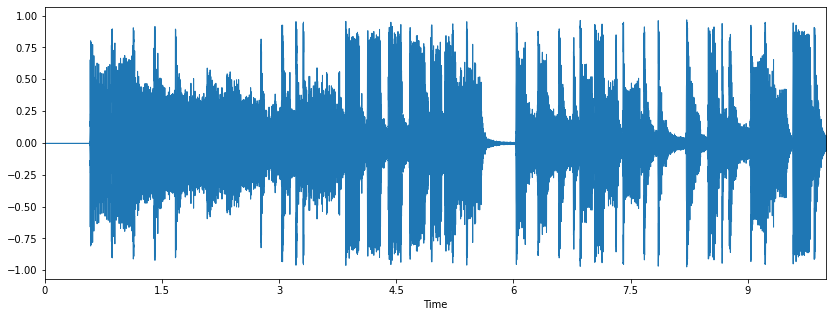

In [22]:
### Dog Sound
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename)
librosa.display.waveplot(data,sr=sample_rate)
Audio(filename)

In [24]:
print(sample_rate)

22050


In [29]:
df_train.sample()

,GroupID,ImageID,Target,Shapes
415,Happy283,Happy28312.wav,Happy,220608


In [28]:
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')
import numpy as np

class Preprocessor:
  def __init__(self, sample_rate : int = 22050, n_mfcc : int=40):
    self.sample_rate = sample_rate
    self.n_mfcc = n_mfcc
  
  def get_features(self, file_name : str):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr= sample_rate, n_mfcc= self.n_mfcc)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features
  
  def visualise(self, file_name):
    plt.figure(figsize=(14,5))
    data,sample_rate=librosa.load(file_name)
    librosa.display.waveplot(data,sr=sample_rate)
    Audio(filename)
    return f"Visuallizing {file_name}"


In [30]:
train_path = "/content/Audio_Files/Audio_Files/Train/"
test_path = "/content/Audio_Files/Audio_Files/Test/"

In [50]:
from rich.progress import track
import os 

Train_Path , Test_Path = [] , []
for target in track(df_train['Target'].unique(), description="Reading Audio Files....",):
  for file_name in os.listdir(train_path + target + "/"):
    Train_Path.append(train_path + target + "/" + file_name)

for target in track(df_test['Target'].unique(), description="Reading Audio Files....",):
  for file_name in os.listdir(test_path + target + "/"):
    Test_Path.append(test_path + target + "/" + file_name)


Output()

Output()

In [51]:
len(Test_Path)

253

In [52]:
df_train['Train_Path'] = np.array(Train_Path)
df_test['Test_Path'] = np.array(Test_Path)

In [53]:
df_train

,GroupID,ImageID,Target,Shapes,Train_Path
0,Happy102,Happy10200.wav,Happy,220608,/content/Audio_Files/Audio_Files/Train/Happy/H...
1,Happy102,Happy10201.wav,Happy,220608,/content/Audio_Files/Audio_Files/Train/Happy/H...
2,Happy102,Happy10202.wav,Happy,220608,/content/Audio_Files/Audio_Files/Train/Happy/H...
3,Happy102,Happy10203.wav,Happy,220608,/content/Audio_Files/Audio_Files/Train/Happy/H...
4,Happy102,Happy10204.wav,Happy,220608,/content/Audio_Files/Audio_Files/Train/Happy/H...
...,...,...,...,...,...
1868,Sad459,Sad45912.wav,Sad,220608,/content/Audio_Files/Audio_Files/Train/Sad/Sad...
1869,Sad459,Sad45913.wav,Sad,220608,/content/Audio_Files/Audio_Files/Train/Sad/Sad...
1870,Sad459,Sad45914.wav,Sad,220608,/content/Audio_Files/Audio_Files/Train/Sad/Sad...
1871,Sad459,Sad45915.wav,Sad,220032,/content/Audio_Files/Audio_Files/Train/Sad/Sad...


In [78]:
features ,target = [] , df_train['Target'].values
test_features , test_target = [], df_test['Target'].values

In [59]:
prpcs = Preprocessor()
features.append(df_train['Train_Path'].apply(prpcs.get_features))
test_features.append(df_test['Test_Path'].apply(prpcs.get_features))

array([['Happy436', 'Happy43600.wav', 'Happy', 220608,
        '/content/Audio_Files/Audio_Files/Test/Happy/Happy48508.wav'],
       ['Happy436', 'Happy43601.wav', 'Happy', 220608,
        '/content/Audio_Files/Audio_Files/Test/Happy/Happy43911.wav'],
       ['Happy436', 'Happy43602.wav', 'Happy', 220608,
        '/content/Audio_Files/Audio_Files/Test/Happy/Happy46500.wav'],
       ...,
       ['Sad491', 'Sad49125.wav', 'Sad', 220608,
        '/content/Audio_Files/Audio_Files/Test/Sad/Sad46202.wav'],
       ['Sad491', 'Sad49126.wav', 'Sad', 220032,
        '/content/Audio_Files/Audio_Files/Test/Sad/Sad46000.wav'],
       ['Sad491', 'Sad49127.wav', 'Sad', 177984,
        '/content/Audio_Files/Audio_Files/Test/Sad/Sad48205.wav']],
      dtype=object)

In [76]:
np.save("X_train.npy", features[0].values)
np.save("X_test.npy", test_features[0].values )

In [80]:
np.save('y_train.npy', target)
np.save('y_test.npy', test_target)

In [81]:
from google.colab import files
files.download('X_train.npy')
files.download('y_train.npy')
files.download('X_test.npy') 
files.download('y_test.npy')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>